In [5]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [6]:
df = sns.load_dataset('titanic')

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df2 = df[['survived', 'pclass', 'age', 'parch']]
df2

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0
...,...,...,...,...
886,0,2,27.0,0
887,1,1,19.0,0
888,0,3,NaN,2
889,1,1,26.0,0


In [9]:
df3 = df2.fillna(df2.mean())

In [10]:
df3

,survived,pclass,age,parch
0,0,3,22.000000,0
1,1,1,38.000000,0
2,1,3,26.000000,0
3,1,1,35.000000,0
4,0,3,35.000000,0
...,...,...,...,...
886,0,2,27.000000,0
887,1,1,19.000000,0
888,0,3,29.699118,2
889,1,1,26.000000,0


In [11]:
x = df3.drop('survived', axis=1)
y = df3['survived']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=51)

In [18]:
x_train.shape

(712, 3)

# using StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
sc.fit(x_train)

StandardScaler()

In [22]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [23]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [24]:
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [31]:
x_train_sc_df = pd.DataFrame(x_train_sc, columns=['pclass', 'age', 'parch'])
x_test_sc_df = pd.DataFrame(x_test_sc, columns=['pclass', 'age', 'parch'])

In [27]:
x_test_sc_df.head()

,pclass,age,parch
0,-1.547500,0.804049,-0.491985
1,0.822005,0.188268,-0.491985
2,0.822005,0.034323,-0.491985
3,-1.547500,0.011163,-0.491985
4,-0.362747,0.342213,0.763547


In [36]:
x_train_sc_df.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


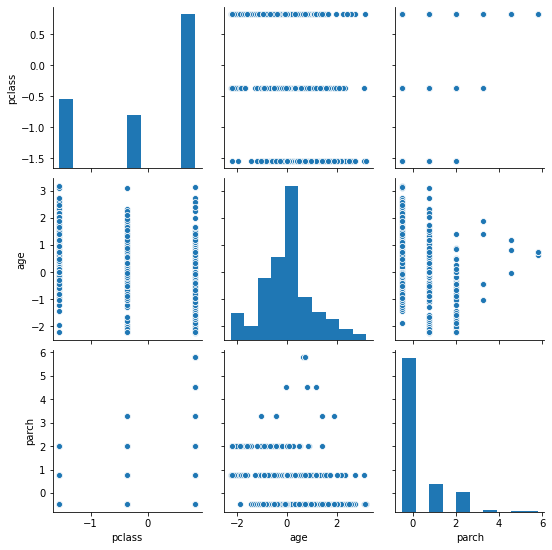

In [49]:
sns.pairplot(x_train_sc_df)

# using MinMax

In [28]:
mmc = MinMaxScaler()

In [29]:
mmc.fit(x_train)

MinMaxScaler()

In [30]:
x_train_mmc = mmc.transform(x_train)
x_test_mmc = mmc.transform(x_test)

In [32]:
x_train_mmc_df = pd.DataFrame(x_train_mmc, columns=['pclass', 'age', 'parch'])
x_test_mmc_df = pd.DataFrame(x_test_mmc, columns=['pclass', 'age', 'parch'])

In [41]:
x_train_mmc_df.head()

,pclass,age,parch
0,1.0,0.334089,0.0
1,1.0,0.780391,0.0
2,1.0,0.149901,0.0
3,1.0,0.249079,0.0
4,1.0,0.414836,0.4


In [46]:
x_train_mmc_df.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,0.653090,0.412781,0.078371
std,0.422326,0.184199,0.159407
min,0.000000,0.000000,0.000000
25%,0.375000,0.305752,0.000000
50%,1.000000,0.414836,0.000000
75%,1.000000,0.489940,0.000000
max,1.000000,1.000000,1.000000


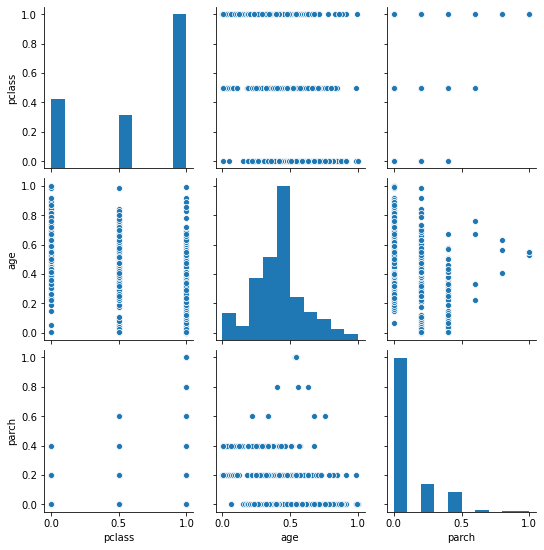

In [48]:
sns.pairplot(x_train_mmc_df)